In [5]:
import os
import cv2
import numpy as np
import pandas as pd

def extract_color_features(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    pixels_rgb = img.reshape(-1, 3)
    pixels_hsv = img_hsv.reshape(-1, 3)

    mean_r, mean_g, mean_b = np.mean(pixels_rgb, axis=0)
    std_r, std_g, std_b = np.std(pixels_rgb, axis=0)

    mean_h, mean_s, mean_v = np.mean(pixels_hsv, axis=0)
    std_h, std_s, std_v = np.std(pixels_hsv, axis=0)

    luminance = 0.2126 * pixels_rgb[:, 0] + 0.7152 * pixels_rgb[:, 1] + 0.0722 * pixels_rgb[:, 2]
    mean_luminance = np.mean(luminance)
    mean_saturation = mean_s

    return {
        'mean_r': mean_r, 'mean_g': mean_g, 'mean_b': mean_b,
        'std_r': std_r, 'std_g': std_g, 'std_b': std_b,
        'mean_h': mean_h, 'mean_s': mean_s, 'mean_v': mean_v,
        'std_h': std_h, 'std_s': std_s, 'std_v': std_v,
        'mean_luminance': mean_luminance,
        'mean_saturation': mean_saturation
    }

def process_image_folder(folder_path, output_csv):
    image_features = []

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(folder_path, filename)
            features = extract_color_features(image_path)
            if features:
                # Ekstrak angka dari nama file (tanpa ekstensi)
                name_only = os.path.splitext(filename)[0]
                try:
                    image_number = int(name_only)
                except ValueError:
                    continue  # skip jika nama bukan angka
                features['image_number'] = image_number
                image_features.append(features)

    # Buat DataFrame dan urutkan berdasarkan angka
    df = pd.DataFrame(image_features)
    df = df.sort_values(by='image_number').reset_index(drop=True)

    # Simpan image_number sebagai kolom pertama
    df = df[['image_number'] + [col for col in df.columns if col != 'image_number']]
    df.rename(columns={'image_number': 'image_name'}, inplace=True)

    df.to_csv(output_csv, index=False)
    print(f"✅ CSV tersimpan dengan urutan 1-300: {output_csv}")


folder_path = '../Datasets/datasets'  
output_csv = 'color_stats.csv'

process_image_folder(folder_path, output_csv)


✅ CSV tersimpan dengan urutan 1-300: color_stats.csv


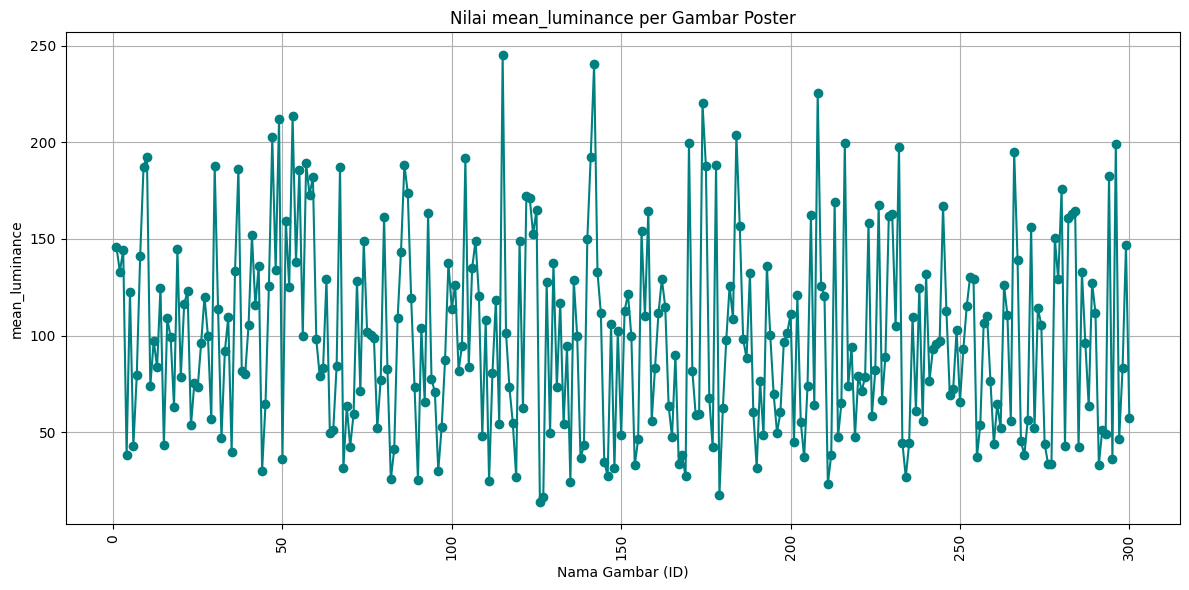

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Baca CSV
df = pd.read_csv('color_stats.csv')

# Ambil semua kolom fitur kecuali nama gambar
feature_columns = [col for col in df.columns if col != 'image_name']

# Jumlah subplot
n_features = len(feature_columns)
n_cols = 3  # jumlah kolom subplot per baris
n_rows = math.ceil(n_features / n_cols)

# Buat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()  # ubah jadi array 1D

for i, feature in enumerate(feature_columns):
    ax = axes[i]
    ax.plot(df['image_name'], df[feature], marker='o', linestyle='-', label=feature, color='teal')
    ax.set_title(feature)
    ax.set_xlabel('Image Name')
    ax.set_ylabel('Value')
    ax.grid(True)

# Sembunyikan subplot kosong (jika ada)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
